In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import interpolate

In [2]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder {folder_path} created successfully.")
    else:
        print(f"Folder {folder_path} already exists.")


create_folder_if_not_exists("plots")
create_folder_if_not_exists("errors")

pi = np.double(np.pi)
interval_start = -2 * pi
interval_end = pi
base_domain = np.arange(interval_start, interval_end, 0.00943)


def function_given(x):
    m = 2
    k = 2
    global pi
    return np.sin(m * x) * np.sin(k * (x * x) / pi)


def first_derivative(x):
    m = 2
    k = 2
    global pi
    return 2 * k * x * np.cos(k * x ** 2 / pi) * np.sin(m * x) / pi + m * np.sin(k * x ** 2 / pi) * np.cos(m * x)

Folder plots already exists.
Folder errors already exists.


**Równomierna dystrybucja**

In [3]:
def even_domain(x_min, x_max, number_of_points):
    return np.linspace(x_min, x_max, number_of_points, dtype=np.double)

**Zera wielomianu Czebyszewa**

In [4]:
def get_chebyshev_zeros(x_min=None, x_max=None, number_of_points=None):
    if x_min is None and x_max is not None or x_min is not None and x_max is None:
        raise ValueError("x_min and x_max must be both None or both not None")
    chebyshev_zeroes = np.array(0, dtype=np.double)
    for k in range(number_of_points):
        cur_zero = np.cos((2 * k + 1) * np.pi / (2 * number_of_points))
        if x_min is not None and x_max is not None:
            cur_zero = (x_max - x_min) / 2 * cur_zero + (x_max + x_min) / 2
        chebyshev_zeroes = np.append(chebyshev_zeroes, cur_zero)
    return chebyshev_zeroes[1:]

**Wizualizacja**

In [5]:
def visualise(domain=None, nodes_x=None, nodes_y=None, f_y=None, Pn_x=None, title=None, x_size=8, y_size=6,
              plot_title=None,
              filename=None):
    '''
    :param domain: array of float64, of x coordinates of points to visualise
    :param nodes_x: array of x coordinates of nodes
    :param nodes_y: array of f(x) for each x in nodes_x
    :param f_y: array of f(x) for each x in domain
    :param Pn_x: array of Pn(x) for each x in domain
    :param title: a string
    :param x_size: size of a figure in x axis
    :param y_size: size of a figure in y axis
    :param plot_title: title of a plot
    :param filename: name of a file to save a figure
    :return: None
    '''
    plt.figure(figsize=(x_size, y_size))
    if nodes_x is not None and nodes_y is not None:
        plt.scatter(nodes_x, nodes_y, label="Węzły", color="green")
    if f_y is not None:
        plt.plot(domain, f_y, label="Zadana funckcja", color="blue")

    if title is not None:
        plt.plot(domain, Pn_x, label=title, color="red")
    if plot_title is not None:
        plt.title(plot_title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    if filename is not None:
        plt.savefig(f"plots/{filename}.png", dpi=300, format='png')
    plt.show()

**Implementacja funkcji do laboratorium**

In [6]:
function_given_values = []
for random_name in range(len(base_domain)):
    function_given_values.append(function_given(base_domain[random_name]))


def get_function_values(X):
    result = np.zeros(len(X), dtype=np.double)
    for i in range(len(X)):
        result[i] = function_given(X[i])
    return result


def get_abs_error(f1, f2):
    max_error = -1
    if len(f1) != len(f2):
        raise Exception("f1 and f2 must have the same length")
    for i in range(len(f1)):
        max_error = max(max_error, abs(f1[i] - f2[i]))
    return max_error


def get_square_mean_error(f1, f2):
    error_sum = 0
    if len(f1) != len(f2):
        raise Exception("f1 and f2 must have the same length")
    for i in range(len(f1)):
        error_sum += (f1[i] - f2[i]) ** 2
    return np.sqrt(error_sum) / len(f1)

**Aproksymacja średniokwadratowa wielomianami algebraicznymi**

In [7]:
def poly_approximation(function, domain, x_zeroes, poly_degree, input_weights=None):
    poly_size = poly_degree + 1
    weights = [1 for _ in range(len(x_zeroes))]
    if input_weights is not None:
        weights = input_weights

    G = np.zeros((poly_size, poly_size), dtype=np.double)
    B = np.zeros(poly_size, dtype=np.double)
    for k in range(poly_size):
        for j in range(poly_size):
            for i in range(len(x_zeroes)):
                G[k][j] += weights[i] * x_zeroes[i] ** (k + j)
        for i in range(len(x_zeroes)):
            B[k] += weights[i] * function(x_zeroes[i]) * x_zeroes[i] ** k

    A = np.linalg.solve(G, B)

    poly_approximation_values = []
    for i in range(len(domain)):
        result = 0
        for j in range(poly_size):
            result += A[j] * domain[i] ** j
        poly_approximation_values.append(result)
    return poly_approximation_values


def visualise_approximation(number_of_nodes, domain, function, poly_degree, filename=None):
    nodes_x = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
    nodes_y = []
    for i in range(len(nodes_x)):
        nodes_y.append(function(nodes_x[i]))
    approximation_result = poly_approximation(function=function,
                                              domain=domain,
                                              x_zeroes=nodes_x,
                                              poly_degree=poly_degree)
    visualise(domain=base_domain, nodes_x=nodes_x, nodes_y=nodes_y, f_y=function_given_values,
              Pn_x=approximation_result,
              title=f"Funkcja aproksymująca",
              plot_title=f"Aproksymacja średniokwadratowa wielomianami algebraicznymi dla {len(nodes_x)} węzłów i m = {poly_degree}",
              filename=filename)

**Wykonanie ćwiczenia**

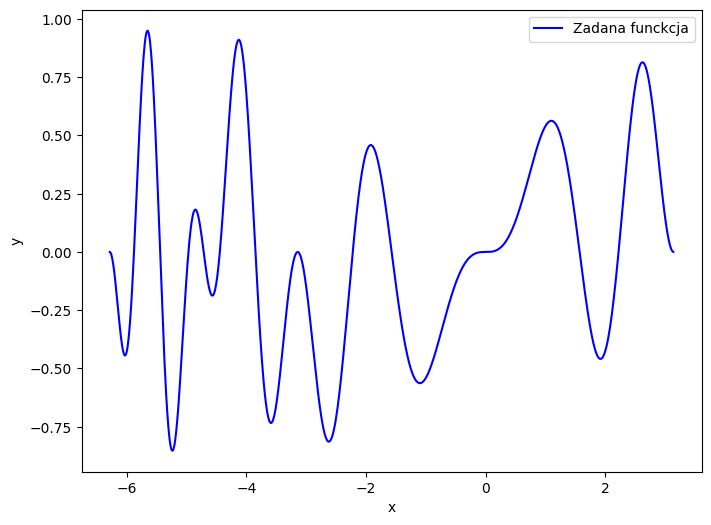

In [8]:
visualise(base_domain, None, None, function_given_values)

10
5
Liczba węzłów:  3  stopień wielomianu:  2


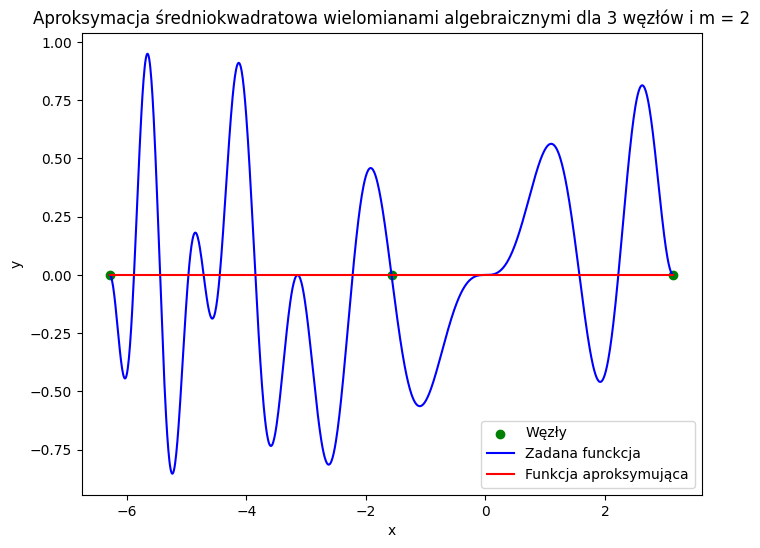

Liczba węzłów:  3  stopień wielomianu:  3


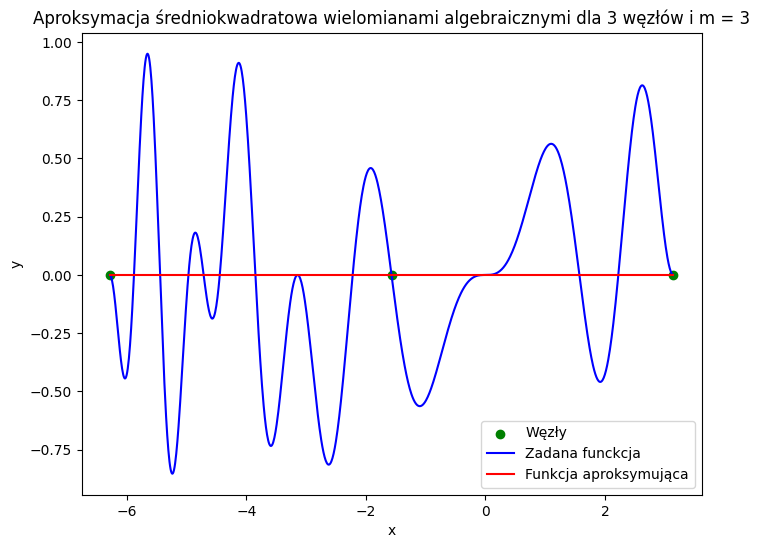

Liczba węzłów:  3  stopień wielomianu:  5


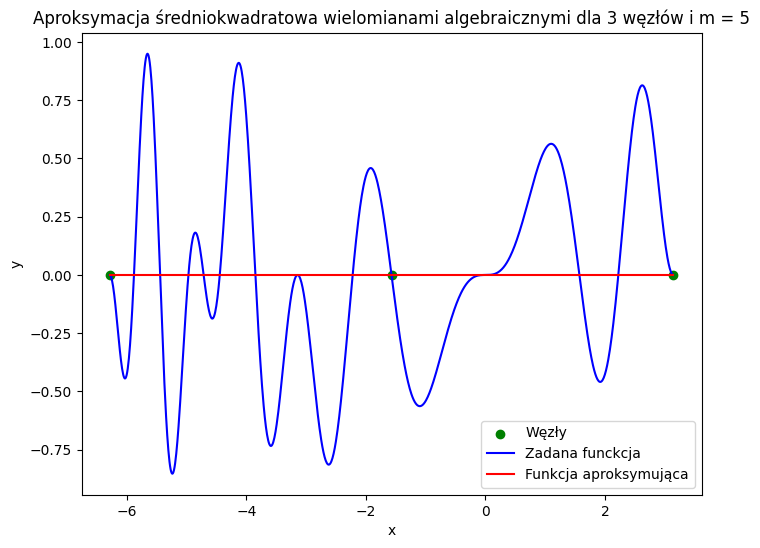

Liczba węzłów:  3  stopień wielomianu:  10


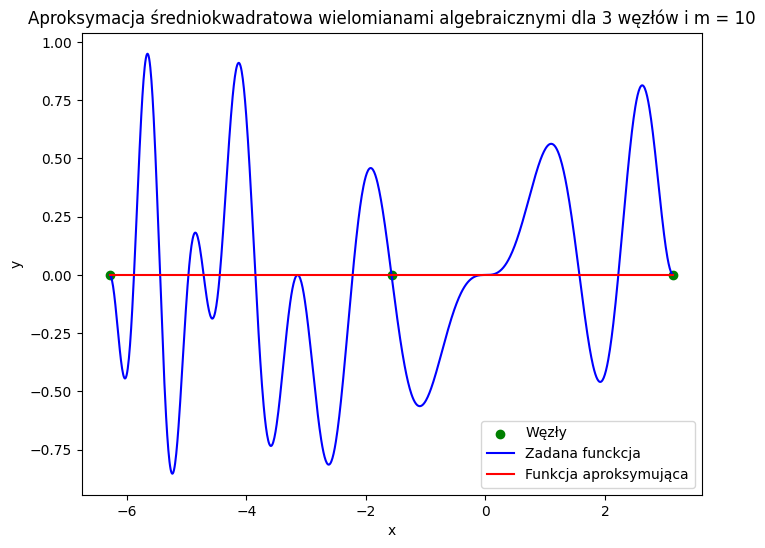

Liczba węzłów:  3  stopień wielomianu:  15


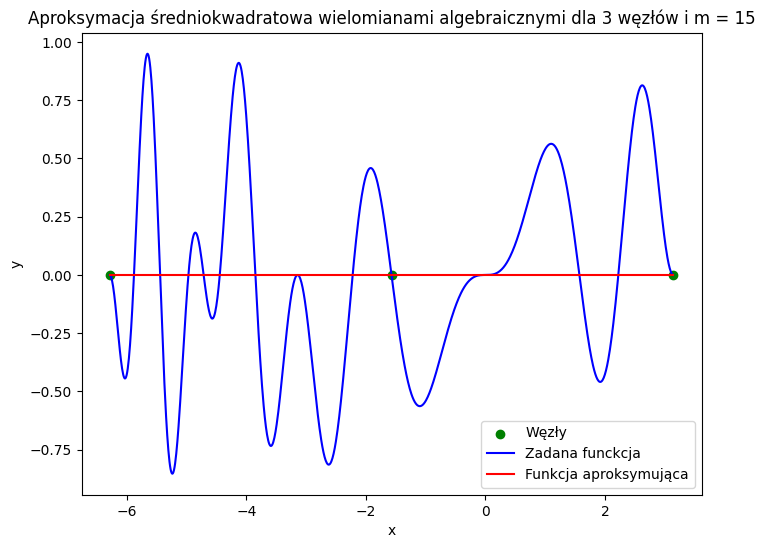

Liczba węzłów:  5  stopień wielomianu:  2


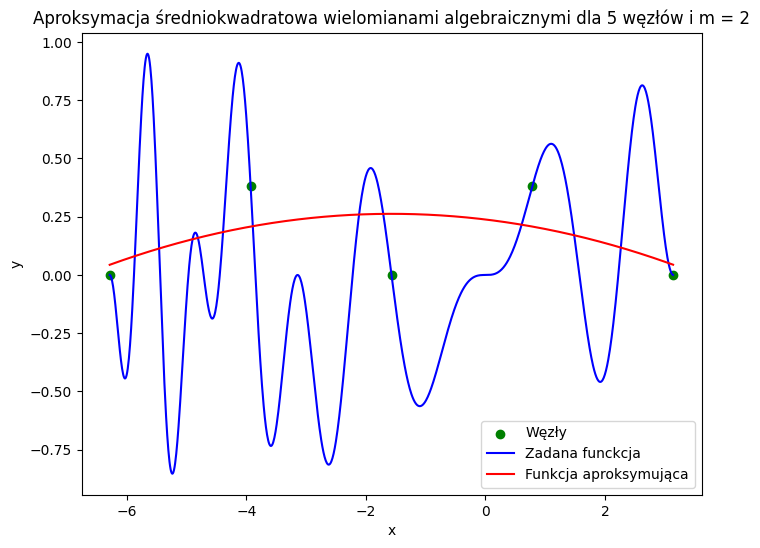

Liczba węzłów:  5  stopień wielomianu:  3


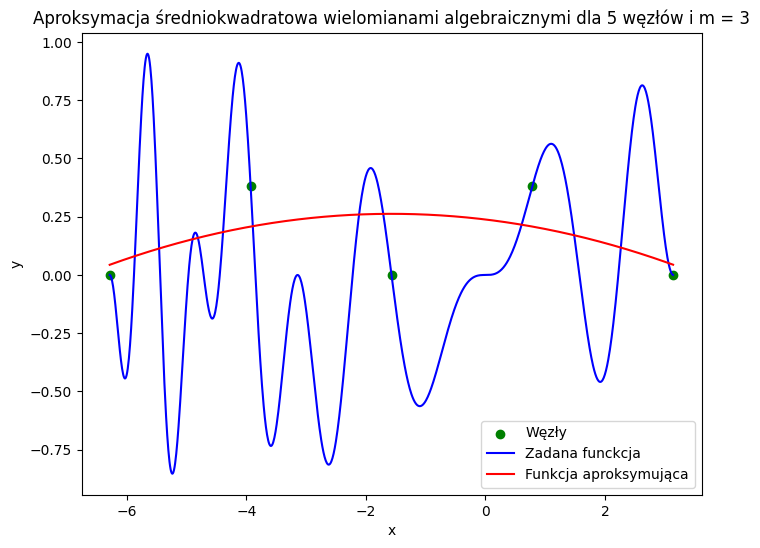

Liczba węzłów:  5  stopień wielomianu:  5


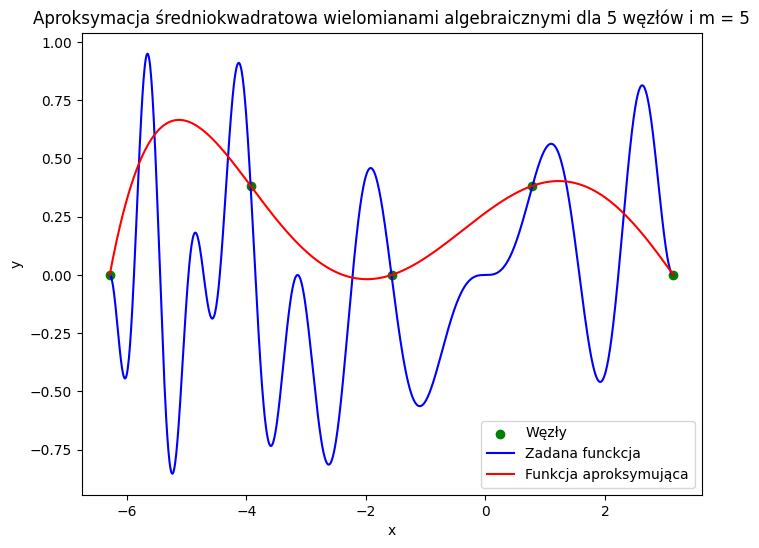

Liczba węzłów:  5  stopień wielomianu:  10


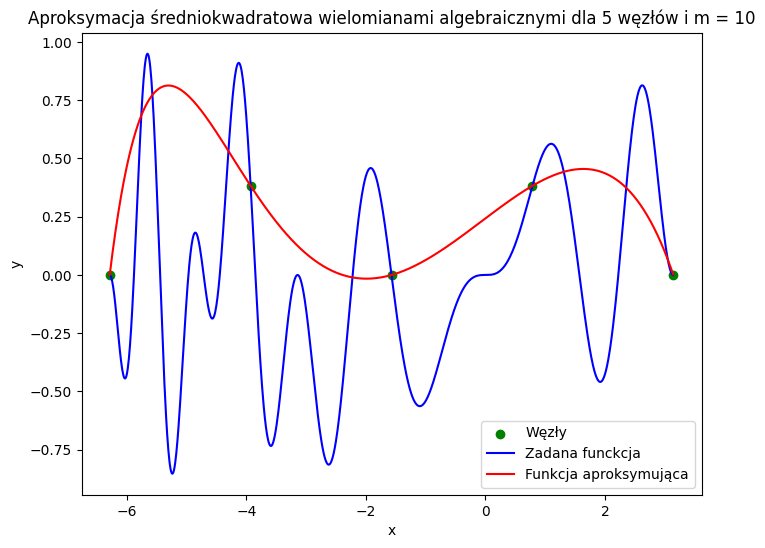

Liczba węzłów:  5  stopień wielomianu:  15


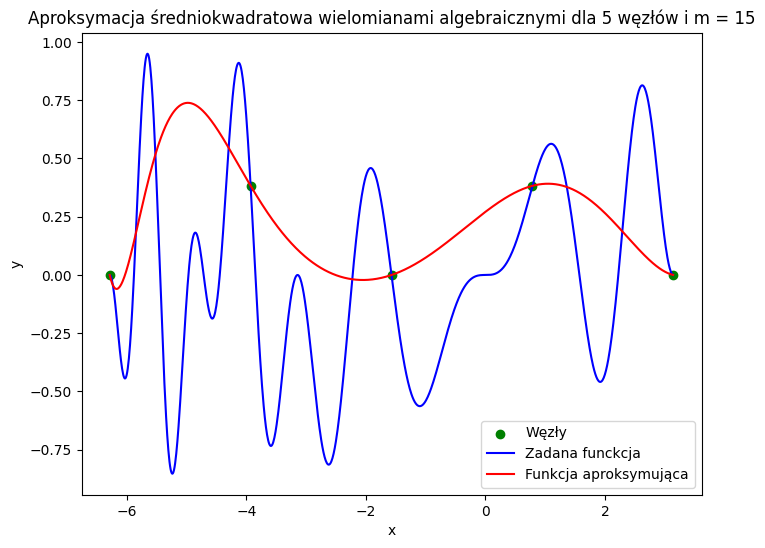

Liczba węzłów:  7  stopień wielomianu:  2


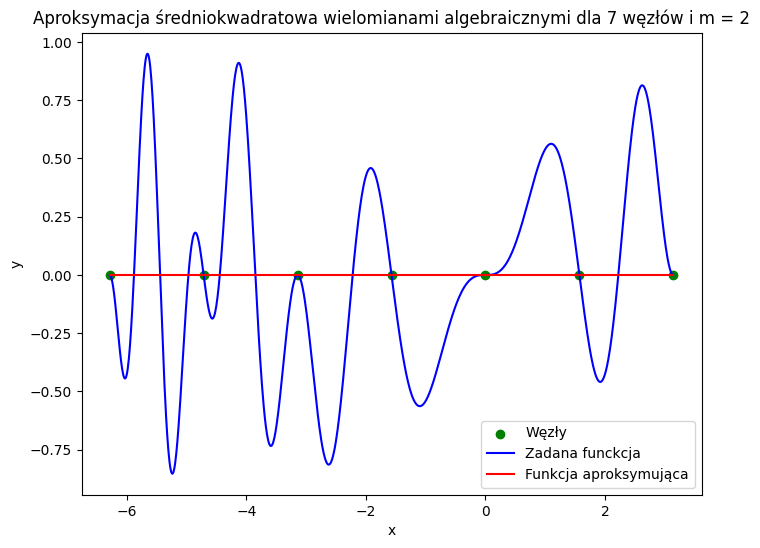

Liczba węzłów:  7  stopień wielomianu:  3


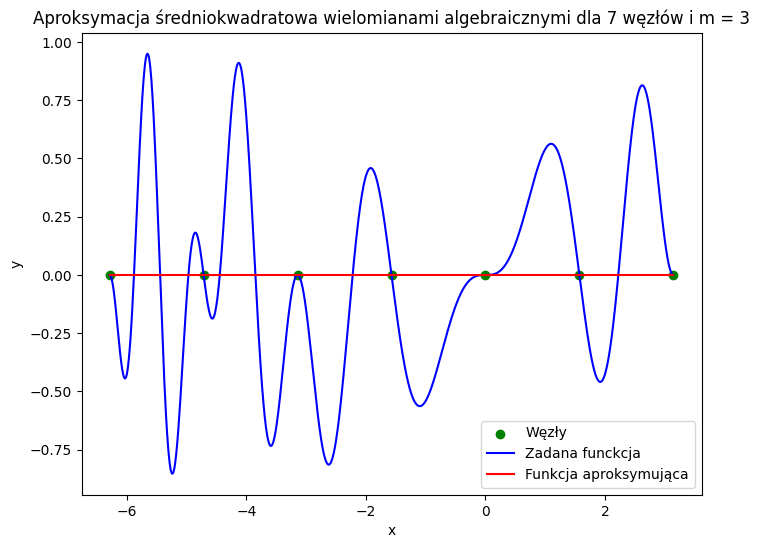

Liczba węzłów:  7  stopień wielomianu:  5


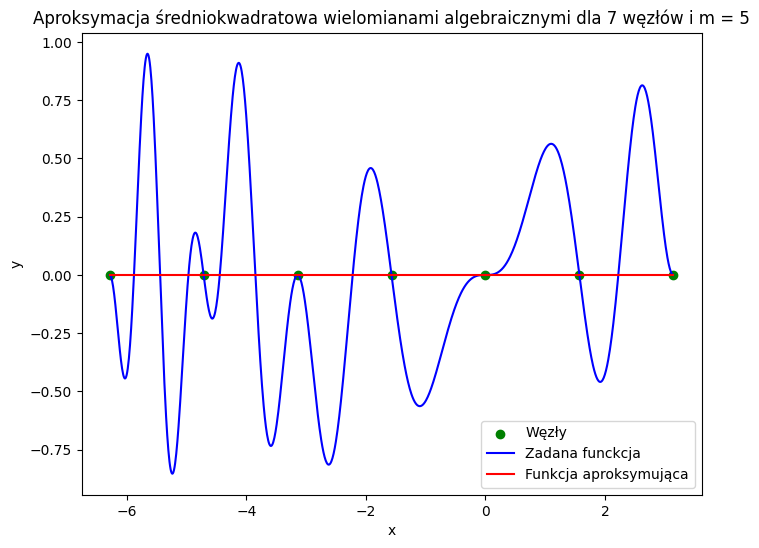

Liczba węzłów:  7  stopień wielomianu:  10


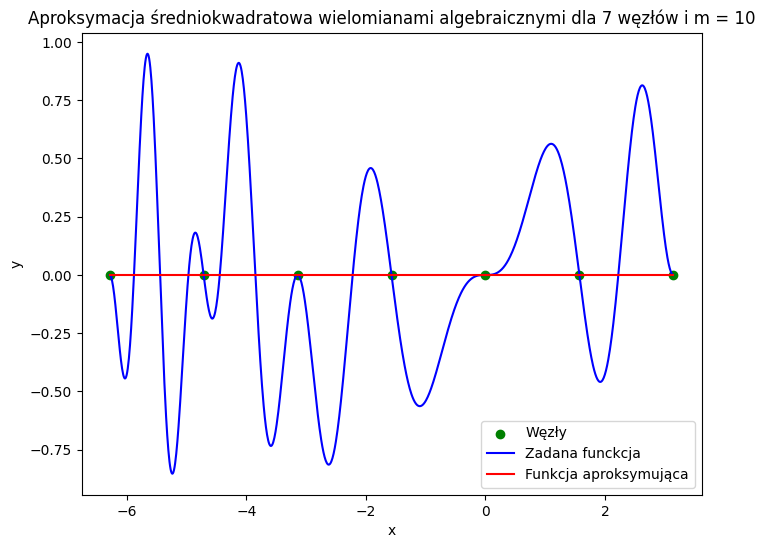

Liczba węzłów:  7  stopień wielomianu:  15


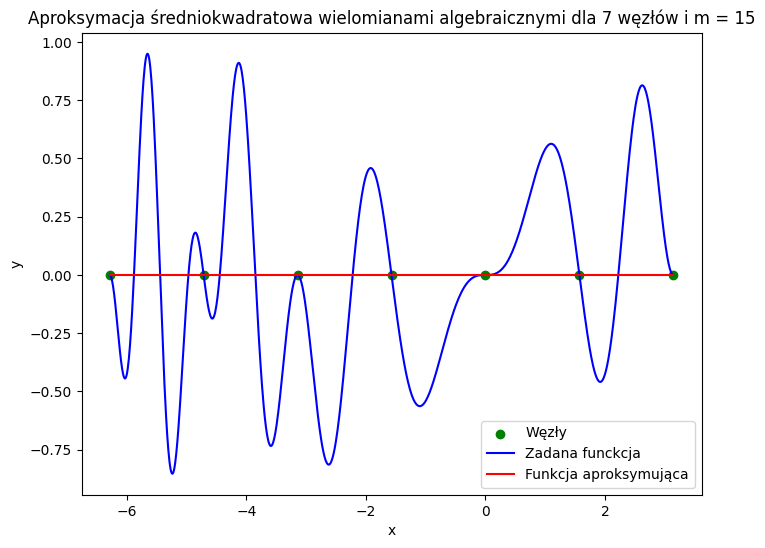

Liczba węzłów:  10  stopień wielomianu:  2


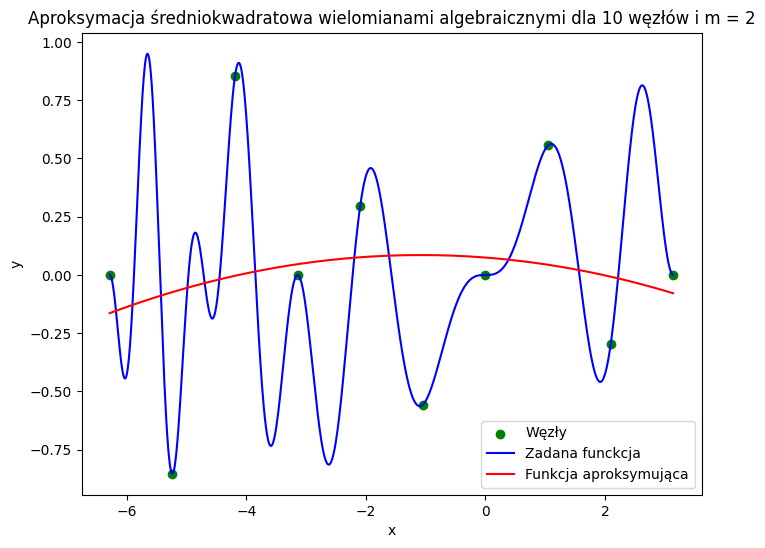

Liczba węzłów:  10  stopień wielomianu:  3


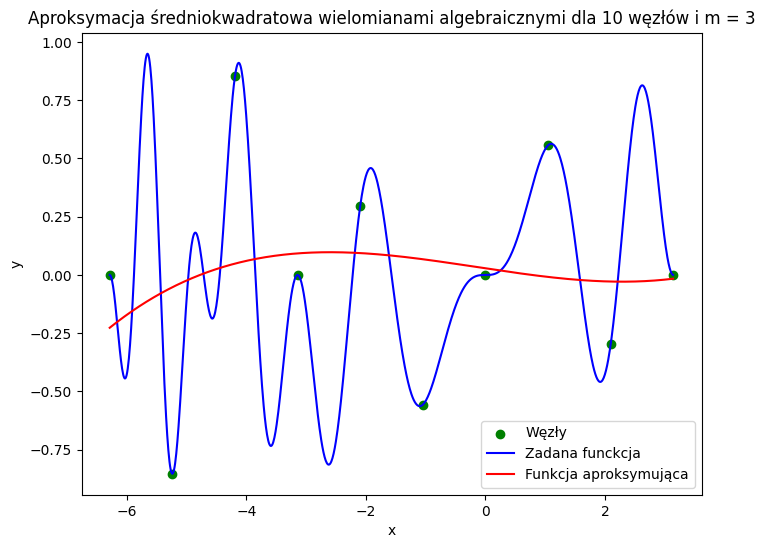

Liczba węzłów:  10  stopień wielomianu:  5


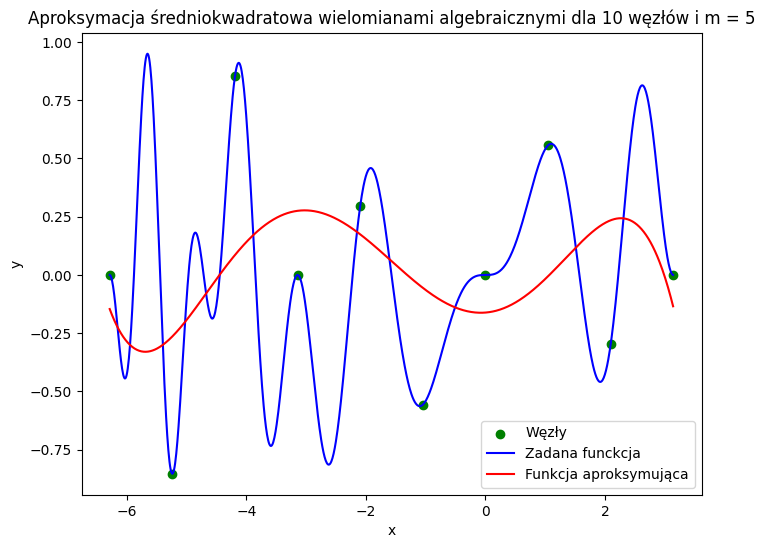

Liczba węzłów:  10  stopień wielomianu:  10


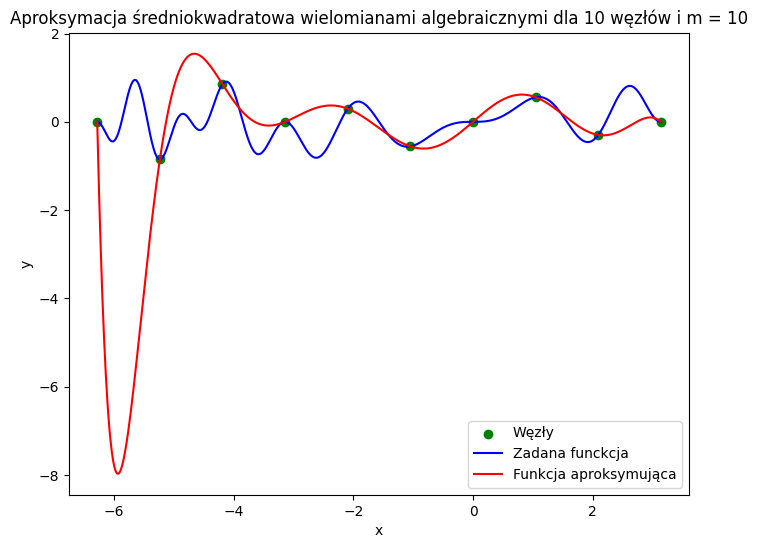

Liczba węzłów:  10  stopień wielomianu:  15


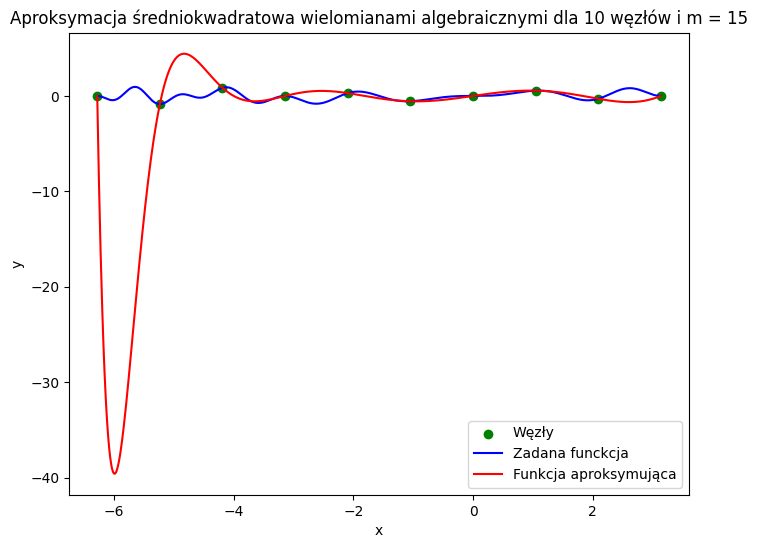

Liczba węzłów:  15  stopień wielomianu:  2


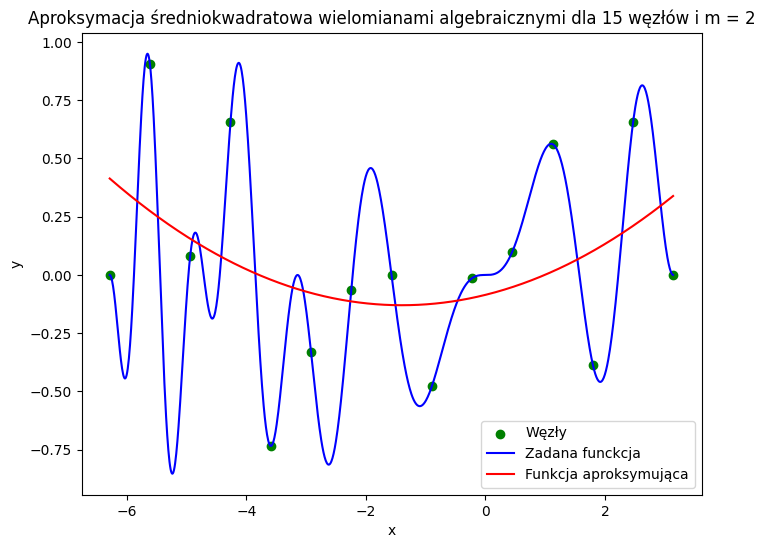

Liczba węzłów:  15  stopień wielomianu:  3


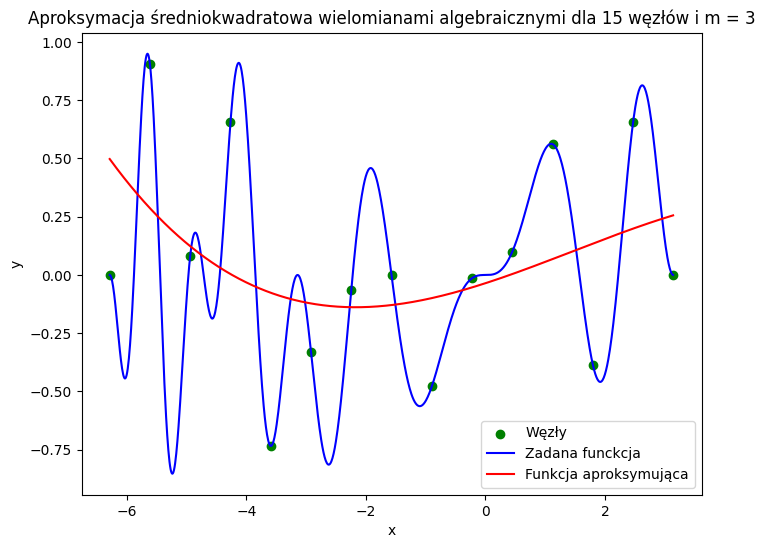

Liczba węzłów:  15  stopień wielomianu:  5


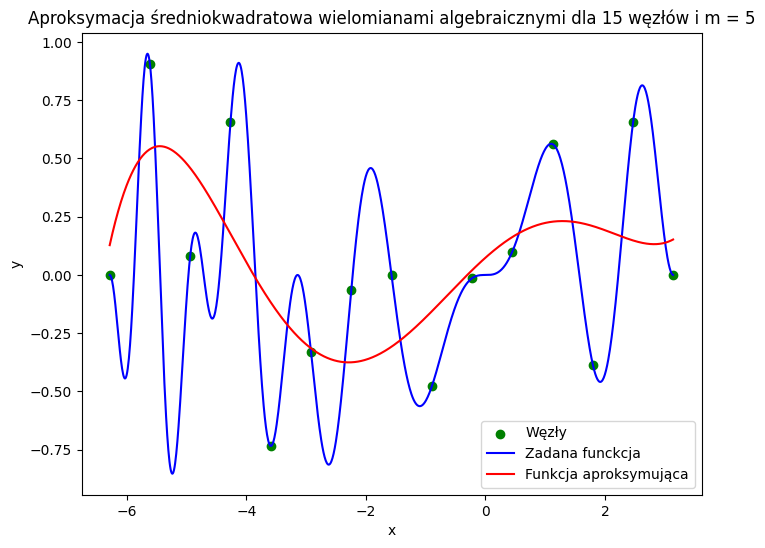

Liczba węzłów:  15  stopień wielomianu:  10


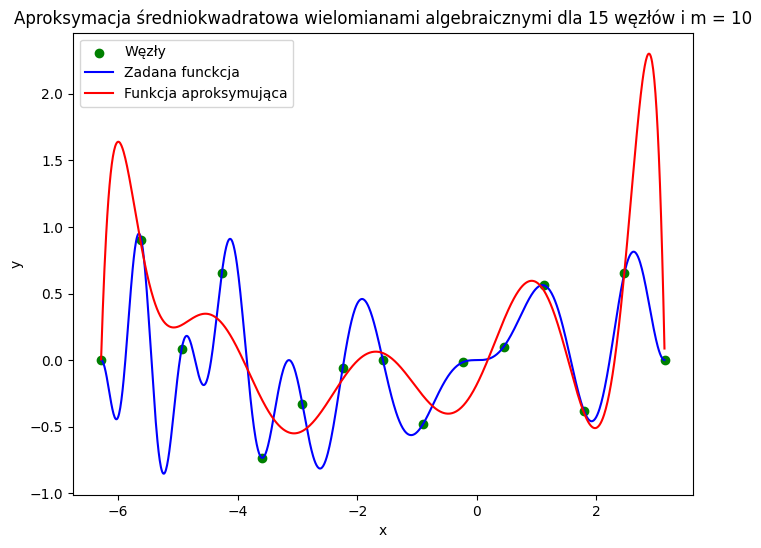

Liczba węzłów:  15  stopień wielomianu:  15


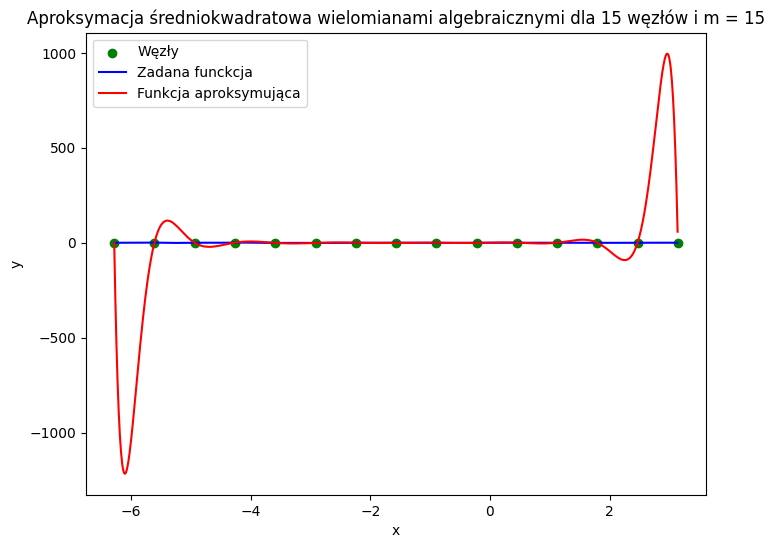

Liczba węzłów:  20  stopień wielomianu:  2


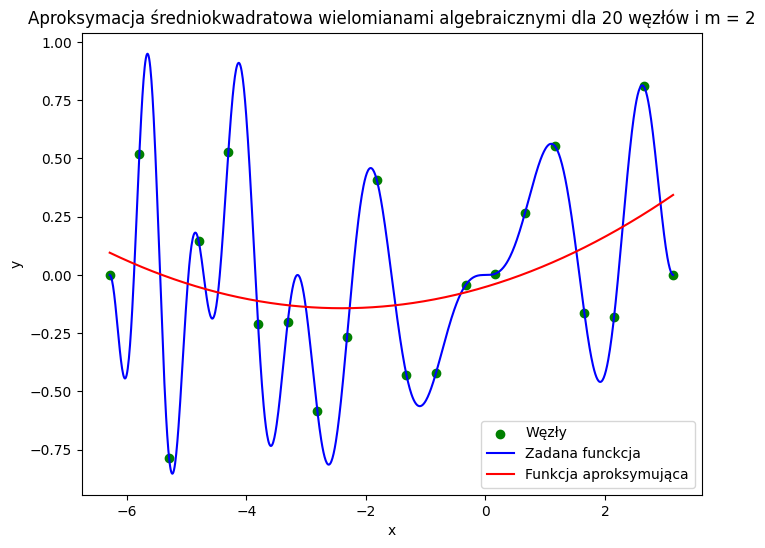

Liczba węzłów:  20  stopień wielomianu:  3


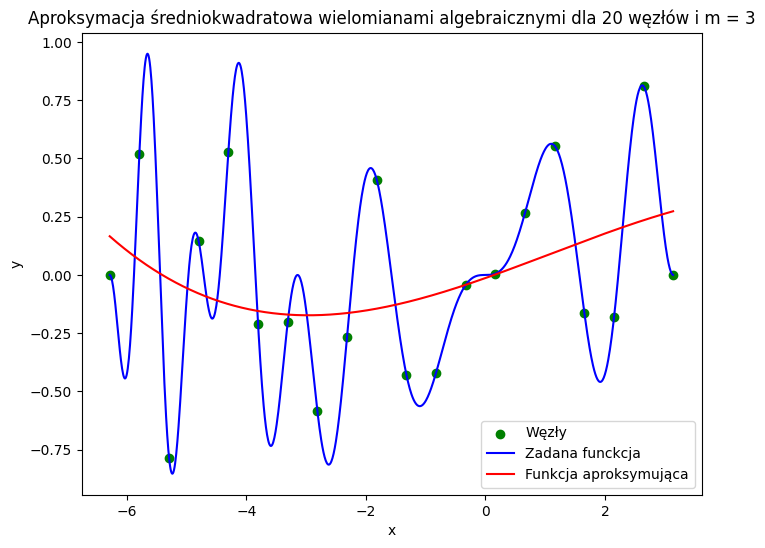

Liczba węzłów:  20  stopień wielomianu:  5


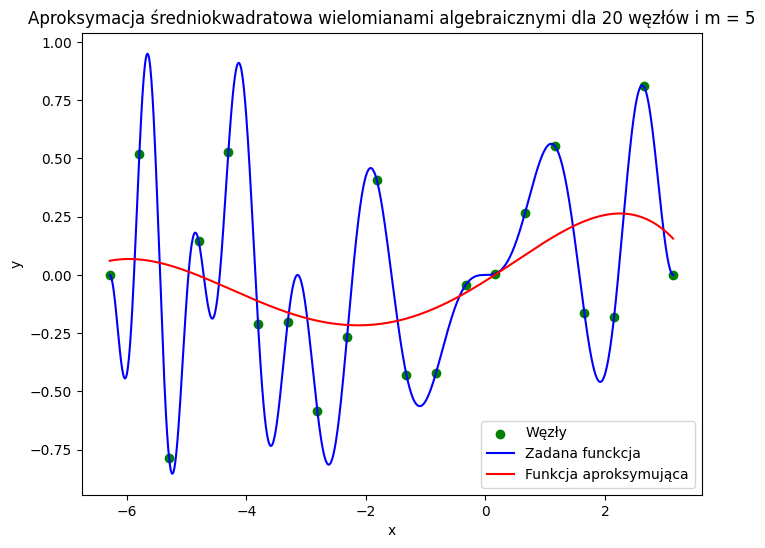

Liczba węzłów:  20  stopień wielomianu:  10


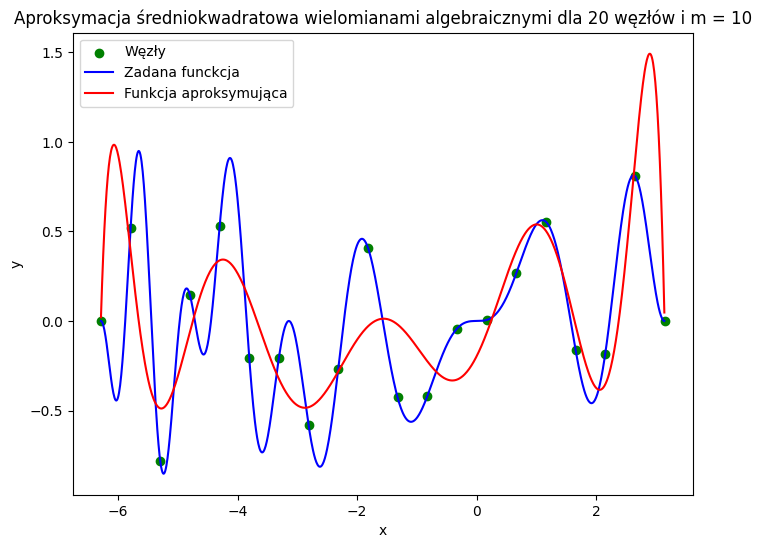

Liczba węzłów:  20  stopień wielomianu:  15


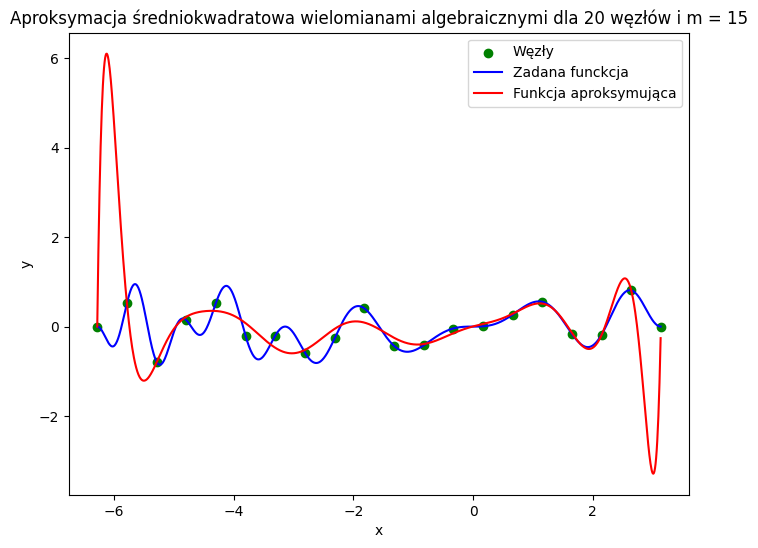

Liczba węzłów:  25  stopień wielomianu:  2


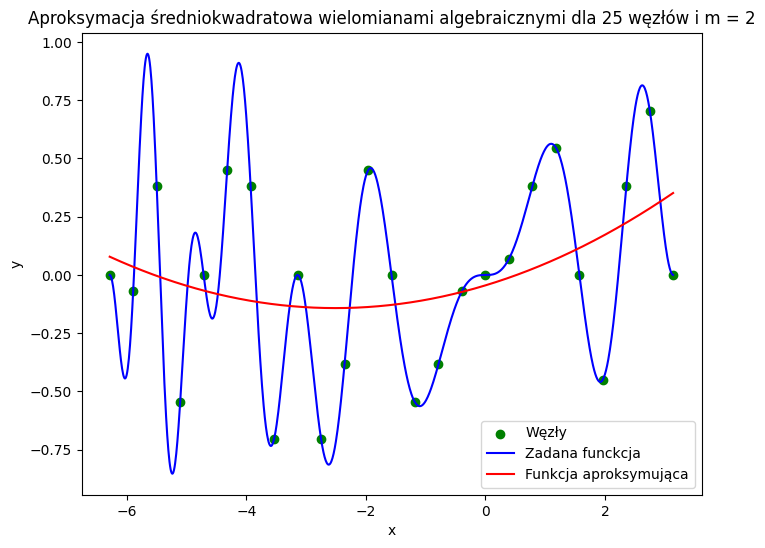

Liczba węzłów:  25  stopień wielomianu:  3


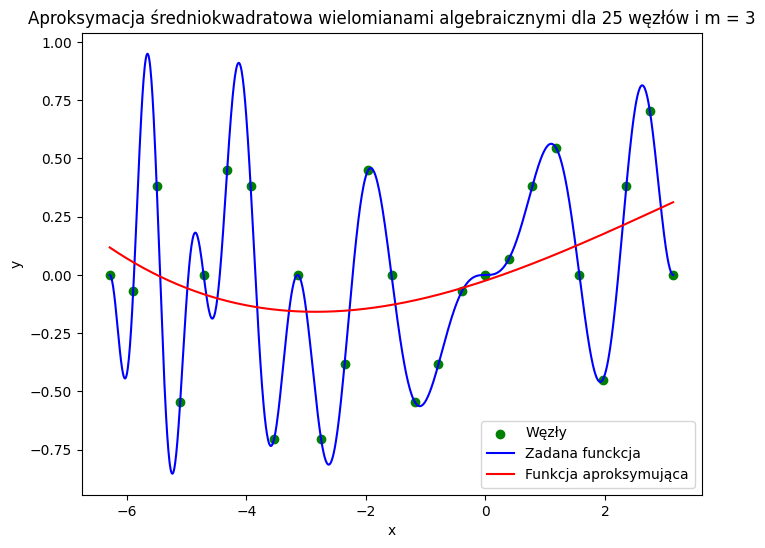

Liczba węzłów:  25  stopień wielomianu:  5


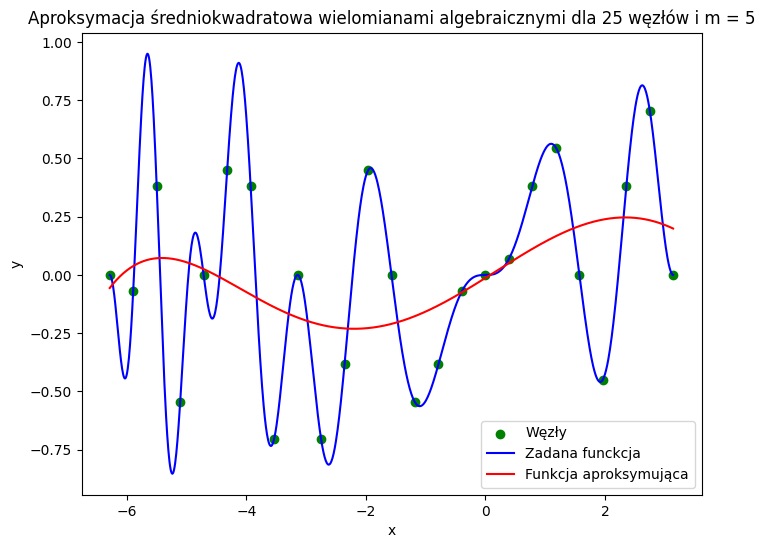

Liczba węzłów:  25  stopień wielomianu:  10


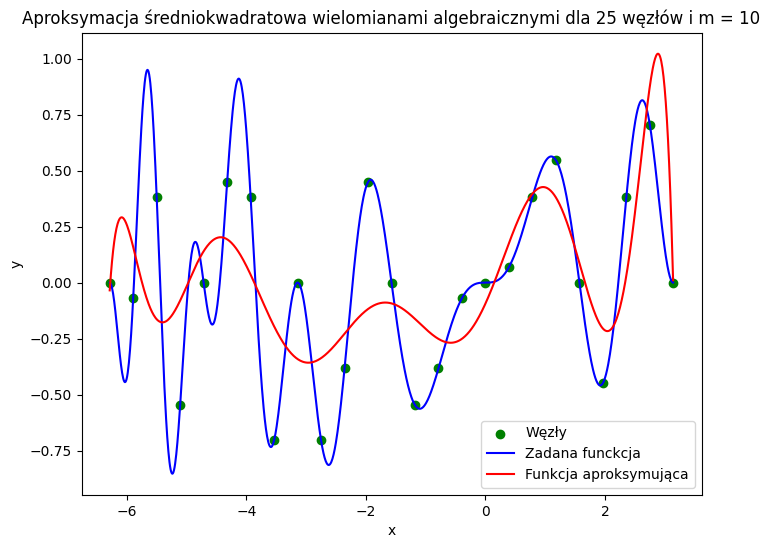

Liczba węzłów:  25  stopień wielomianu:  15


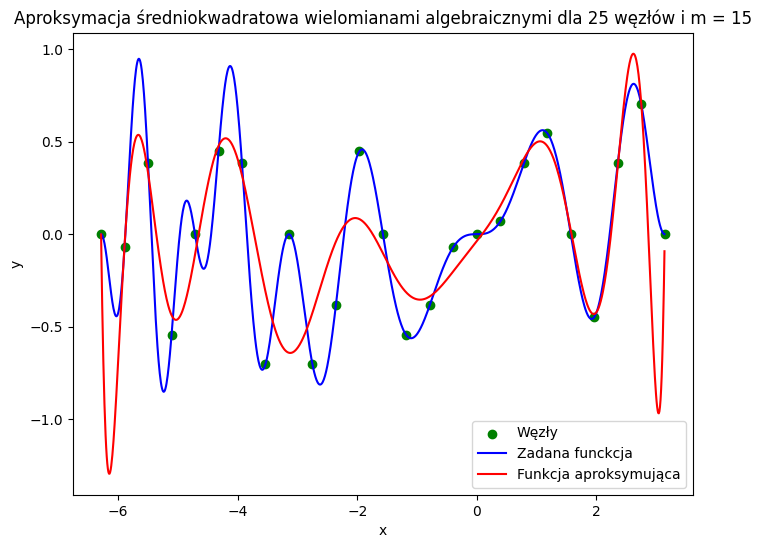

Liczba węzłów:  30  stopień wielomianu:  2


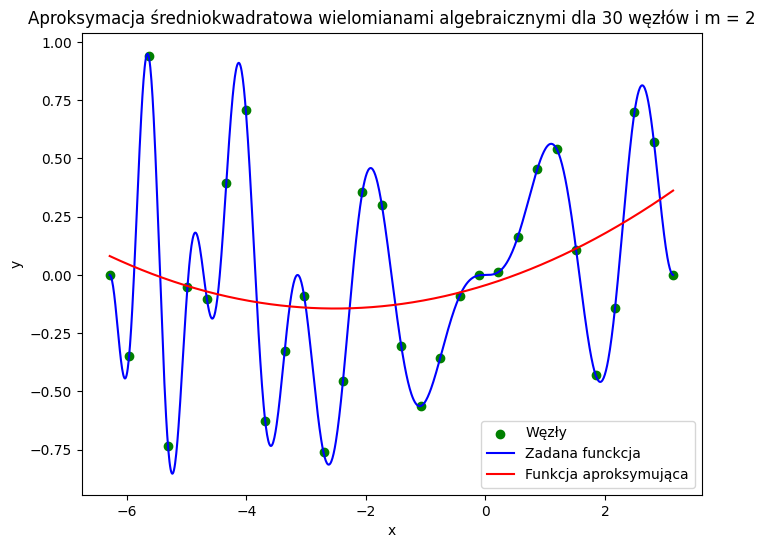

Liczba węzłów:  30  stopień wielomianu:  3


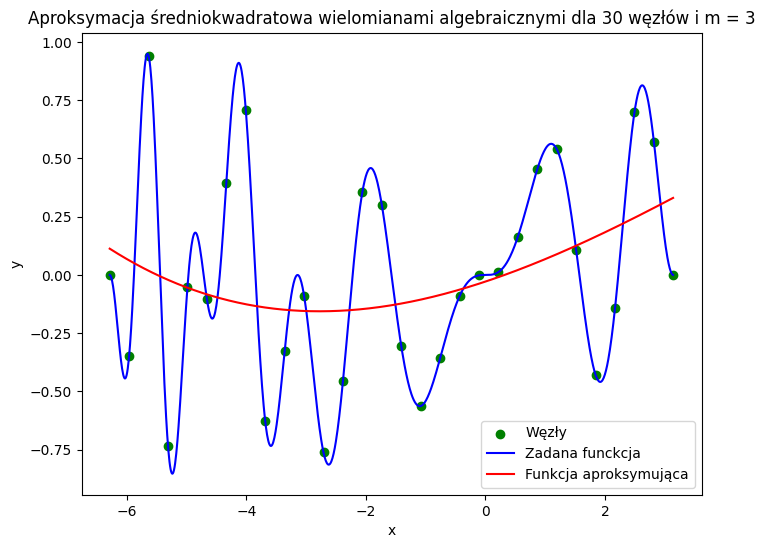

Liczba węzłów:  30  stopień wielomianu:  5


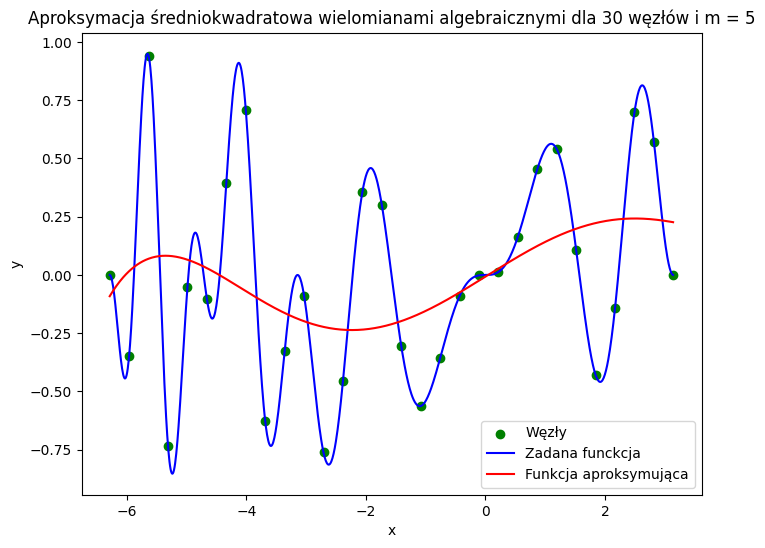

Liczba węzłów:  30  stopień wielomianu:  10


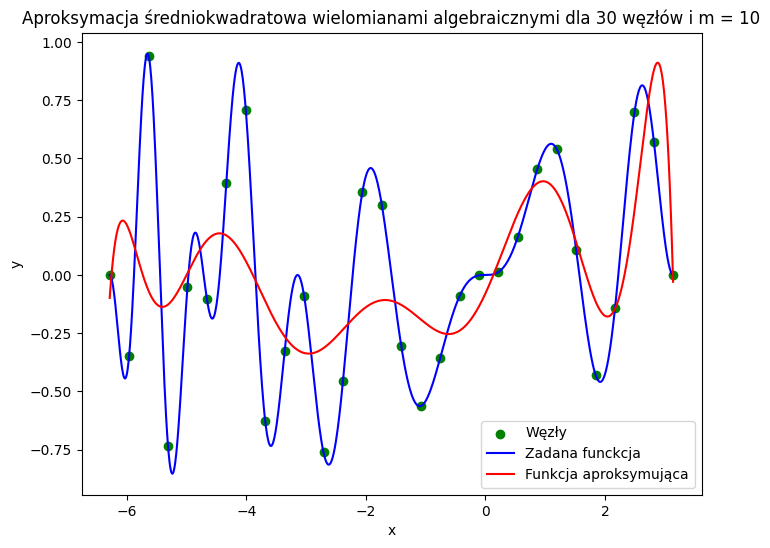

Liczba węzłów:  30  stopień wielomianu:  15


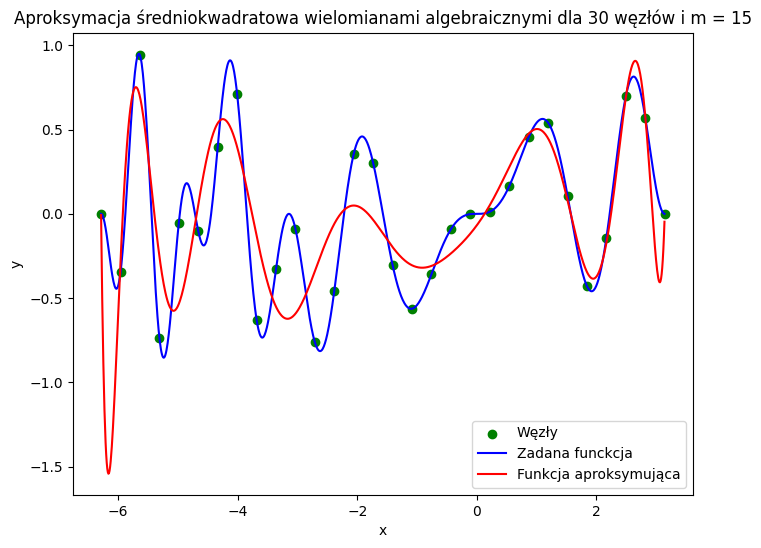

Liczba węzłów:  35  stopień wielomianu:  2


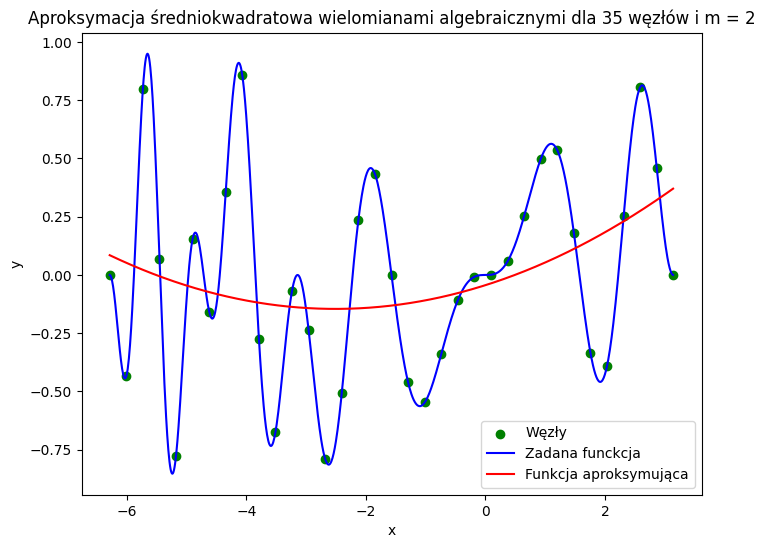

Liczba węzłów:  35  stopień wielomianu:  3


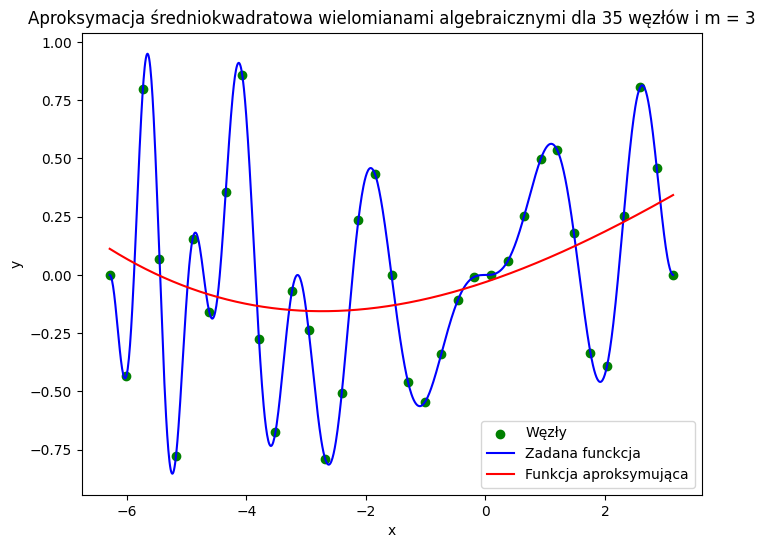

Liczba węzłów:  35  stopień wielomianu:  5


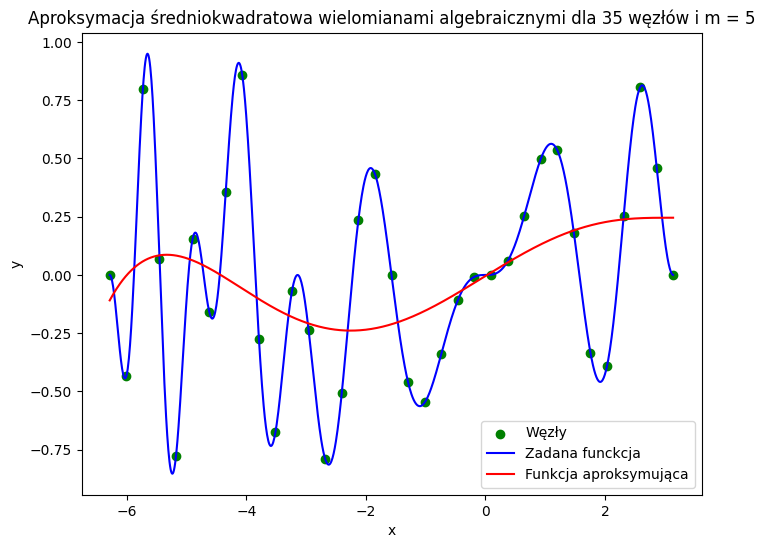

Liczba węzłów:  35  stopień wielomianu:  10


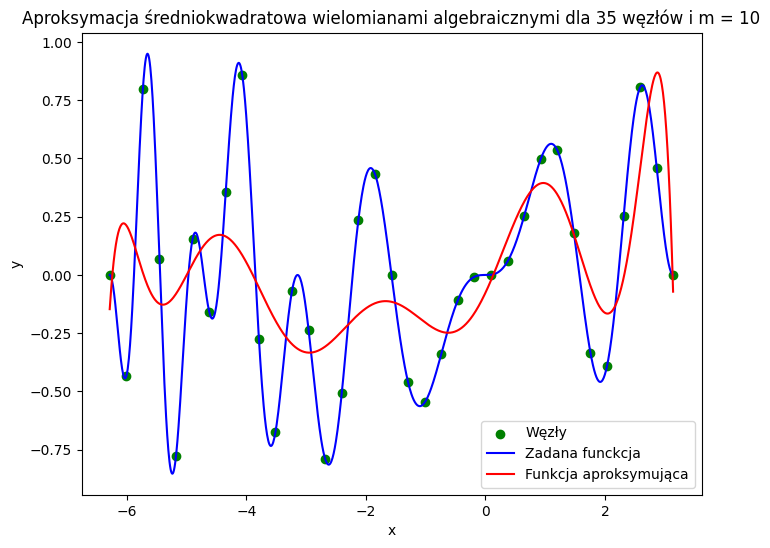

Liczba węzłów:  35  stopień wielomianu:  15


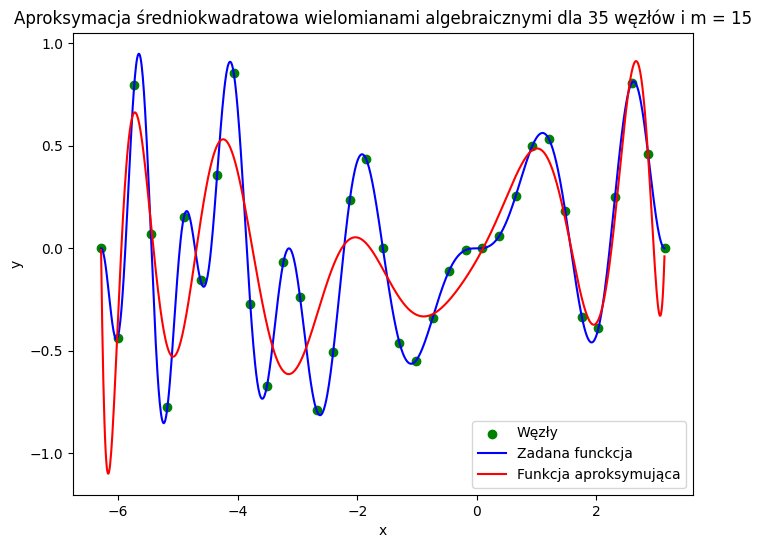

Liczba węzłów:  50  stopień wielomianu:  2


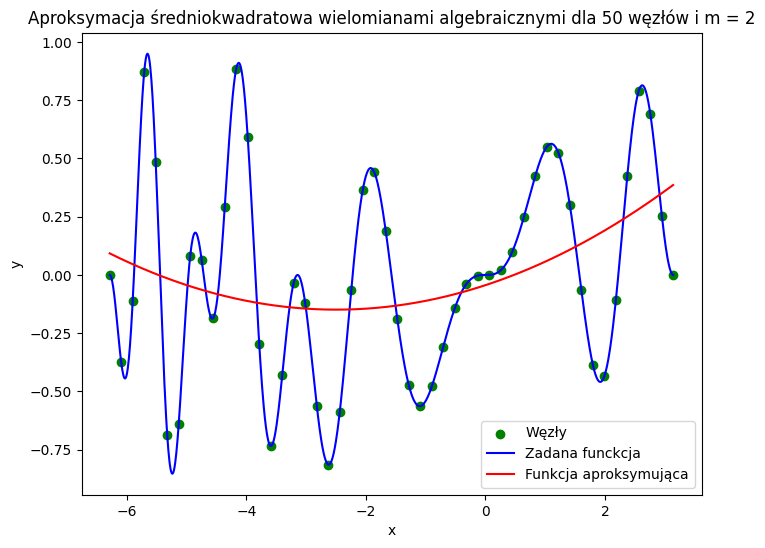

Liczba węzłów:  50  stopień wielomianu:  3


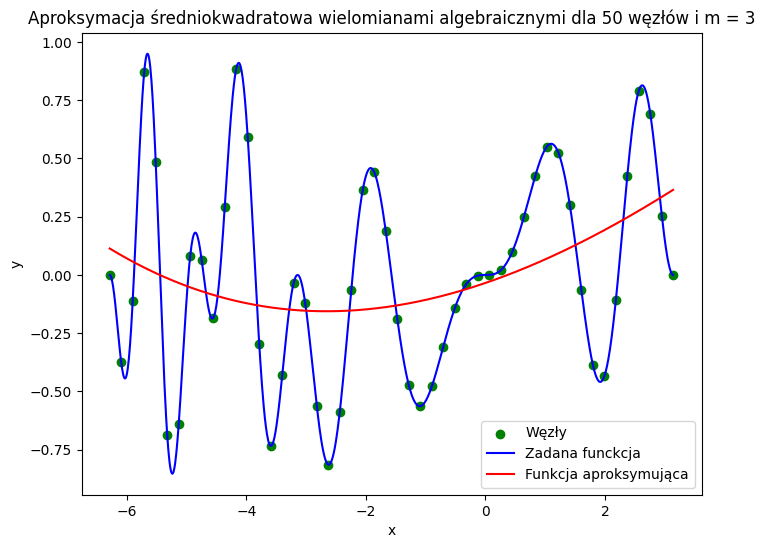

Liczba węzłów:  50  stopień wielomianu:  5


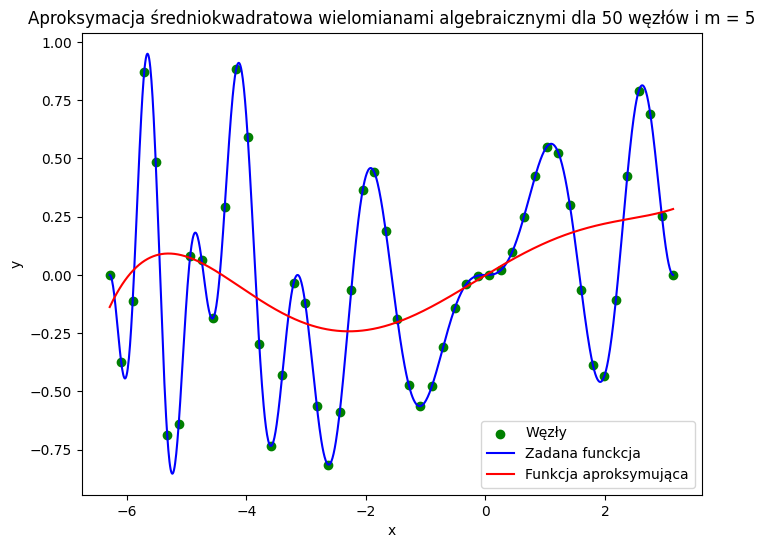

Liczba węzłów:  50  stopień wielomianu:  10


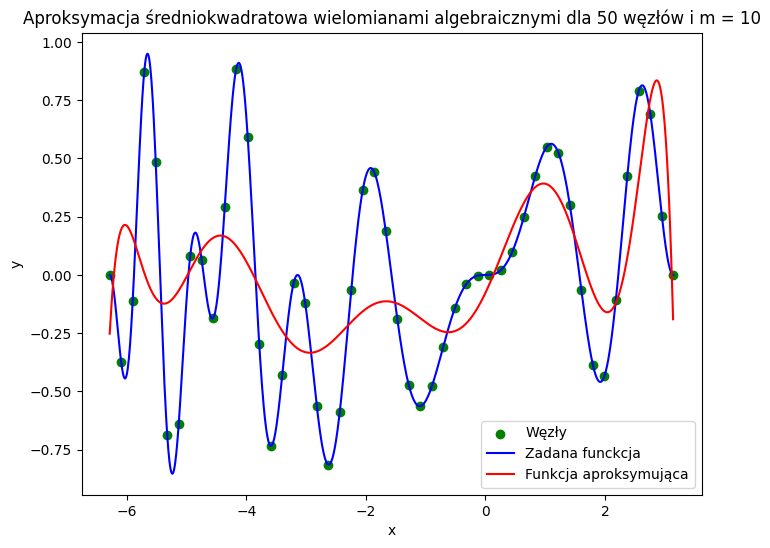

Liczba węzłów:  50  stopień wielomianu:  15


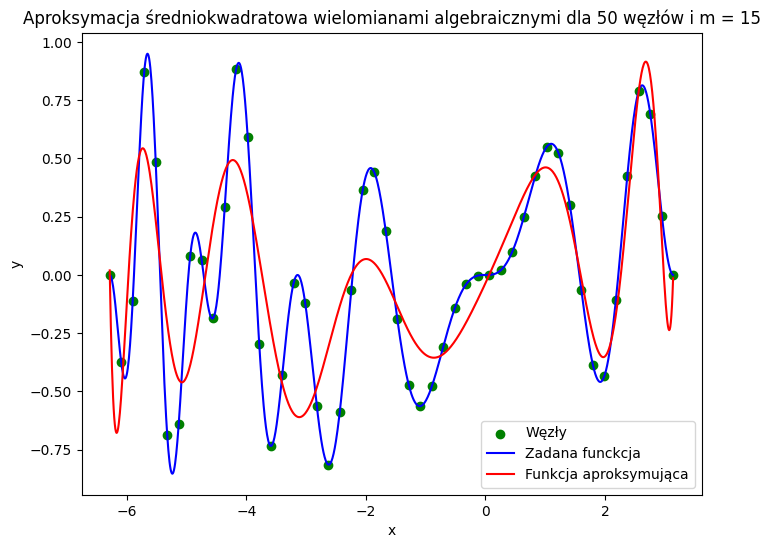

In [9]:
given_number_of_nodes = [3, 5, 7, 10, 15, 20, 25, 30, 35, 50]
given_poly_degree = [2, 3, 5, 10, 15]

print(len(given_number_of_nodes))
print(len(given_poly_degree))


def get_all_visualisations(number, degree):
    print("Liczba węzłów: ", number, " stopień wielomianu: ", degree)
    even_nodes = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number)
    chebyshev_nodes = get_chebyshev_zeros(x_min=interval_start, x_max=interval_end, number_of_points=number)
    visualise_approximation(number_of_nodes=number,
                            domain=base_domain,
                            function=function_given,
                            poly_degree=degree,
                            filename=f"n_{number}_m_{degree}")


for number in given_number_of_nodes:
    for degree in given_poly_degree:
        get_all_visualisations(number, degree)

In [10]:
import csv


def save_to_csv(filename, data):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [12]:
def approximation_results_errors():
    global given_number_of_nodes
    csv_header = ["n", "m", "błąd maksymalny", "błąd sumy kwadratów"]
    csv_file = [csv_header]
    for number_of_nodes in given_number_of_nodes:
        for cur_degree in given_poly_degree:
            csv_record = [number_of_nodes, cur_degree]
            even_nodes = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
            exact_result = function_given_values

            poly_approximation_result = poly_approximation(function=function_given,
                                                           domain=base_domain,
                                                           x_zeroes=even_nodes,
                                                           poly_degree=cur_degree)
            poly_approximation_abs_error = get_abs_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_abs_error)
            poly_approximation_result_sqrt_error = get_square_mean_error(exact_result, poly_approximation_result)
            csv_record.append(poly_approximation_result_sqrt_error)
            csv_file.append(csv_record)
        save_to_csv("errors/poly_approx_errors.csv", csv_file)


approximation_results_errors()